In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

# Dataset

Dimensions de X :  (100, 2)
Dimensions de y :  (100, 1)


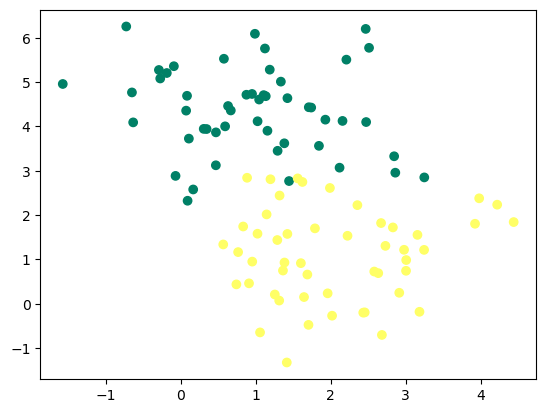

In [2]:
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state = 0)
y = y.reshape((y.shape[0], 1))

print("Dimensions de X : ", X.shape)
print("Dimensions de y : ", y.shape)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = "summer")
plt.show()

## Initialisation

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

## Modèle (Frontière de décision et fonction Sygmoid)

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

## Fonction cout

In [5]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

## Gradient

In [6]:
def gradient(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

## Mise à jour des gradients

In [7]:
def update(dW, db, W, b, learning_rate):
    W -= learning_rate * dW
    b -= learning_rate * db
    return (W, b)

In [8]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

## Assemblage

In [9]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    W, b = initialisation(X)

    Loss = []

    for i in tqdm(range(n_iter + 1)):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradient(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

100%|██████████| 101/101 [00:00<00:00, 7232.67it/s]


0.88


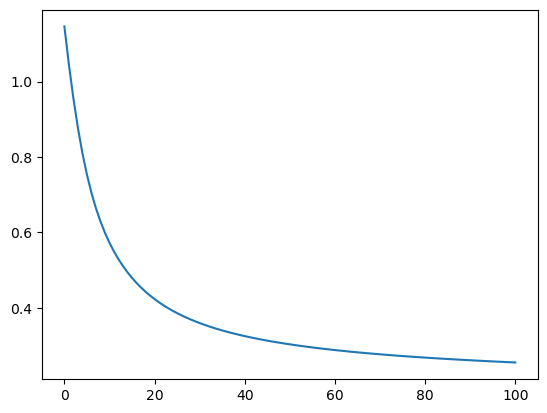

In [10]:
W, b = artificial_neuron(X, y)

# Frontière de décision

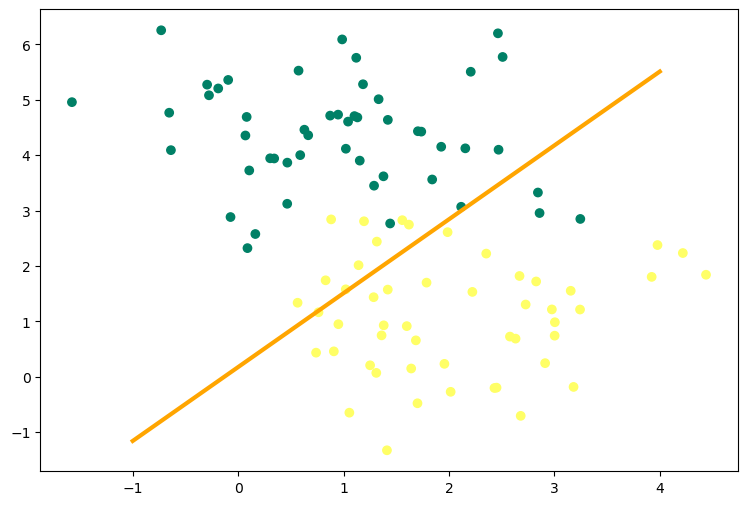

In [11]:
fig, ax = plt.subplots(figsize = (9,6))
ax.scatter(X[:, 0], X[:, 1], c = y, cmap = "summer")

x1 = np.linspace(-1, 4, 100)
x2 = (-W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c = "orange", lw = 3)

# Visualisation 3D

In [12]:
import plotly.graph_objects as go

In [13]:
fig = go.Figure(data = [go.Scatter3d( 
    x = X[:, 0].flatten(),
    y = X[:, 1].flatten(),
    z = y.flatten(),
    mode = 'markers',
    marker = dict(
        size = 5,
        color = y.flatten(),                
        colorscale = 'YlGn',  
        opacity = 0.8,
        reversescale = True
    )
)])

fig.update_layout(template = "plotly_dark", margin = dict(l = 0, r = 0, b = 0, t = 0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [14]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data = [go.Surface(z = A, x = xx0, y = xx1, colorscale = 'YlGn', opacity = 0.7, reversescale = True)]))

fig.add_scatter3d(x = X[:, 0].flatten(), y = X[:, 1].flatten(), z = y.flatten(), mode = 'markers', marker = dict(size = 5, color = y.flatten(), colorscale = 'YlGn', opacity = 0.9, reversescale = True))


fig.update_layout(template = "plotly_dark", margin = dict(l = 0, r = 0, b = 0, t = 0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

## Prédiction (Chat VS Chien)

In [15]:
import h5py
import numpy as np


def load_data():
    train_dataset = h5py.File('DataSets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) 
    y_train = np.array(train_dataset["Y_train"][:]) 

    test_dataset = h5py.File('DataSets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) 
    y_test = np.array(test_dataset["Y_test"][:]) 
    
    return X_train, y_train, X_test, y_test

In [16]:
X_train, y_train, X_test, y_test = load_data()

In [17]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts = True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [18]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts = True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


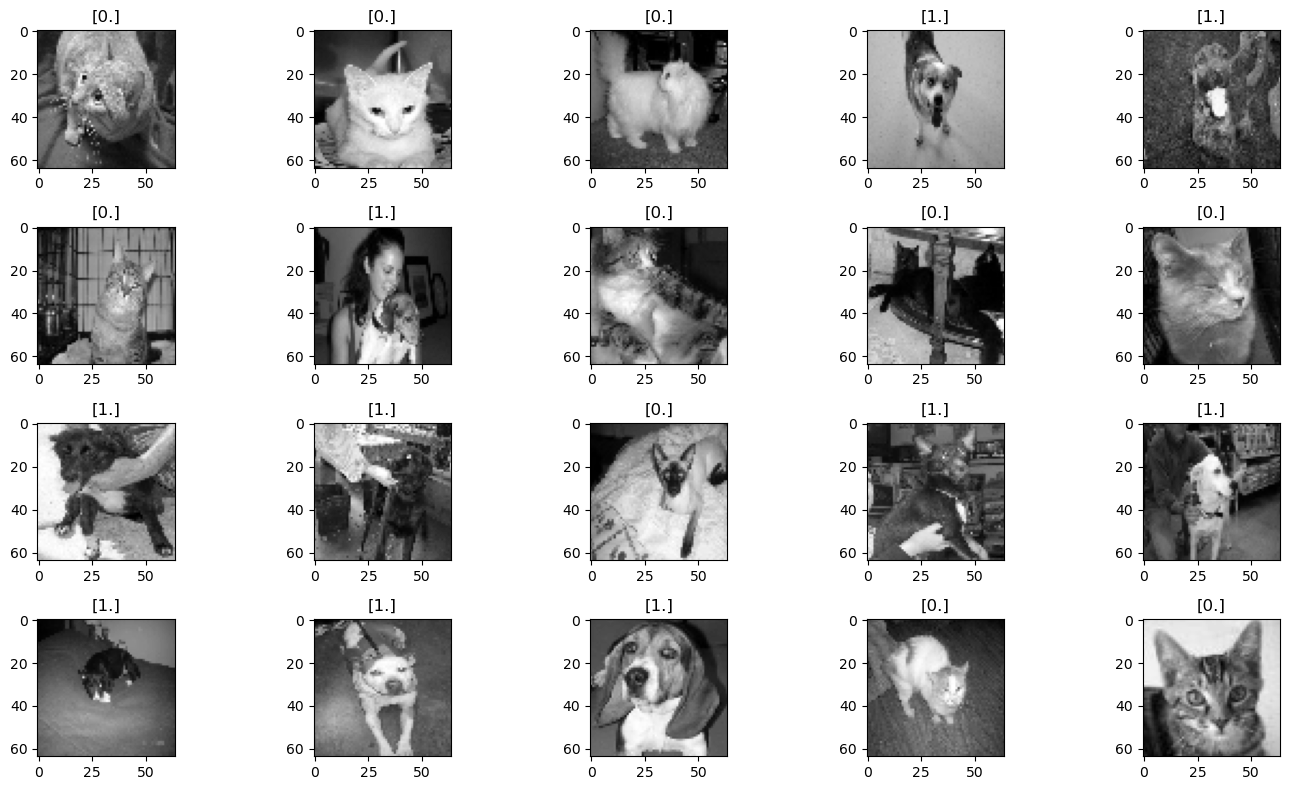

In [19]:
plt.figure(figsize = (16, 8))

for i in range(1, 21):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(y_train[i])
    plt.tight_layout()
    
plt.show()